# How to get the JOGL DB as a network for meta study explorations
Follow this notebook to know how to get the latest version of the JOGL DB as a network. But first let's load some libraries

## Dependencies
- networkx for anything network related
- requests for anything http and more 

In [1]:
import requests
import networkx as nx

## Let's define a few useful functions
We are going to use the API endpoint of JOGL, let's look at the documentation: https://documenter.getpostman.com/view/8688524/SWE84xMg?version=latest

Ok, so, we want the network right? https://documenter.getpostman.com/view/8688524/SWE84xMg?version=latest#86b5aa24-e54b-486b-8a73-f414b88c3744

Cool so we find the two enpoints that interest us:

- GET https://jogl-backend.herokuapp.com/api/networks  to Index all available networks 
- GET https://jogl-backend.herokuapp.com/api/networks/:id  to Get one network 

alright let's code

In [4]:
base_url = "https://jogl-backend.herokuapp.com/api/networks"

In [5]:
def get_index():
    "This function gets the index and returns the parsed json as a python dict"
    r = requests.get(base_url)
    if r.status_code != 200:
        print("Something went wrong with the request !")
    return r.json()

def print_indexes():
    json_index = get_index()
    print("Networks available:")
    for element in json_index:
        print("- Network with id={} was created at {}".format(element['id'], element['created_at']))

Great so now we can get our index, and print it nicely, let's try it

In [6]:
print_indexes()

Networks available:
- Network with id=1 was created at 2020-03-25T18:42:08.282Z
- Network with id=2 was created at 2020-03-25T22:09:16.930Z
- Network with id=3 was created at 2020-03-26T05:01:32.844Z
- Network with id=4 was created at 2020-03-27T05:01:16.744Z
- Network with id=5 was created at 2020-03-28T05:01:01.193Z
- Network with id=6 was created at 2020-03-29T05:01:44.868Z
- Network with id=7 was created at 2020-03-30T05:02:24.496Z
- Network with id=8 was created at 2020-03-31T05:01:19.251Z
- Network with id=9 was created at 2020-04-01T05:01:35.272Z
- Network with id=10 was created at 2020-04-03T05:01:29.000Z
- Network with id=11 was created at 2020-04-04T05:01:45.178Z
- Network with id=12 was created at 2020-04-05T05:01:20.615Z
- Network with id=13 was created at 2020-04-06T05:02:02.701Z
- Network with id=14 was created at 2020-04-09T05:01:41.931Z
- Network with id=15 was created at 2020-04-10T05:02:26.442Z
- Network with id=16 was created at 2020-04-11T05:01:32.933Z
- Network wit

## Get a network
Ok, now that we know which `id` are available, we can grab a network ! as we said above, we use this URL: 

- GET https://jogl-backend.herokuapp.com/api/networks/:id where we replace :id by the id we want to get

let's define a helper again

In [8]:
def get_one_network(network_id):
    url = base_url + "/" + str(network_id)
    r = requests.get(url)
    if r.status_code != 200:
        print("Something went wrong with the request !")
    return r.json()["json_network"]

In [87]:
network = get_one_network(26)

## Great, let's load it into networkx !
Ok, now that is a nice JSON network following the JSONgraph format. Cool, but, I mean, python rules, so let's load it into networkx !

In [88]:
import datetime

In [89]:
def get_dt(node):
    if 'created_at' in node['metadata']:
        if node['metadata']['created_at'] != None:
            return datetime.datetime.strptime(node['metadata']['created_at'], '%Y-%m-%dT%H:%M:%S.%fZ')
    return None

In [90]:
# First we create a directed graph
G = nx.DiGraph()

In [91]:
# Then we iterate over all the nodes and add them to G
nodes = network['graph']['nodes']
for node_id in nodes:
    node = nodes[node_id]
    dt = get_dt(node)
    G.add_node(node_id, type=node["type"], label=node["label"], created_at=dt)

In [92]:
G.nodes['User_1']

{'type': 'User',
 'label': 'LeoBlondel',
 'created_at': datetime.datetime(2019, 6, 20, 16, 52, 25, 601000)}

In [93]:
def get_dt(node):
    if 'created_at' in node['label']:
        if node['label']['created_at'] != None:
            return datetime.datetime.strptime(node['label']['created_at'], '%Y-%m-%dT%H:%M:%S.%fZ')
    return None

In [94]:
# We do the same for the edges
edges = network['graph']['edges']
for edge in edges:
    source = edge["source"]
    target = edge["target"]
    relation = edge["relation"]
    dt = get_dt(edge)
    G.add_edge(source, target, relation=relation, created_at=dt)

Awesome ! Now we can play with this network, but maybe this is going to be used by others in Cytoscape, so let's save it as GraphML ! 

In [95]:
out = "./JOGL_network.graphml"
nx.write_graphml(G, out)

KeyError: <class 'NoneType'>

In [97]:
for node in G.nodes():
    break

In [98]:
node.split('_')[0]

'Need'

In [99]:
node_types = []
for node in G.nodes():
    typ = node.split("_")[0]
    if typ not in node_types:
        node_types.append(typ)

In [100]:
edge_type = {}
for edge in G.edges.data():
    source = edge[0].split('_')[0]
    target = edge[1].split('_')[0]
    relation = edge[2]['relation']
    if source not in edge_type:
        edge_type[source] = {}
    edge_type[source][target] = relation

In [101]:
edge_type

{'User': {'Post': 'has_clapped',
  'Project': 'is_member_of',
  'Comment': 'is_author_of',
  'Need': 'has_followed',
  'User': 'has_visited',
  'Program': 'has_followed',
  'Community': 'is_member_of',
  'Skill': 'has_skill',
  'Challenge': 'has_visited',
  'Interest': 'has_interest',
  'Ressource': 'has_ressource'},
 'Need': {'Skill': 'has_skill', 'Ressource': 'has_ressource'},
 'Post': {'User': 'is_mentioning', 'Project': 'is_mentioning'},
 'Challenge': {'Skill': 'has_skill'},
 'Project': {'Skill': 'has_skill',
  'Interest': 'has_interest',
  'Need': 'has_need',
  'Challenge': 'is_part_of'},
 'Community': {'Skill': 'has_skill',
  'Ressource': 'has_ressource',
  'Interest': 'has_interest'},
 'Comment': {'Post': 'is_comment_of'}}

In [102]:
S = nx.DiGraph()

In [103]:
for node in node_types:
    S.add_node(node)

In [104]:
for source in edge_type:
    for target in edge_type[source]:
        S.add_edge(source, target, relation=edge_type[source][target])

In [105]:
out = "./JOGL_HIN_Schema.graphml"
nx.write_graphml(S, out)

# Let's plot this ?

Ok let's use the pyVis library because I never used it so let's learn ?

https://pyvis.readthedocs.io/en/latest/tutorial.html

In [ ]:
from pyvis.network import Network

In [ ]:
pyG = Network()

In [ ]:
pyG.from_nx(G)

In [ ]:
pyG.show("mygraph.html")

# Well that's a little too much oups ! 

Let's try another plotting lib, clearly pyVis collapses with that many elements ... sad !

In [106]:
import matplotlib.pyplot as plt

%matplotlib inline

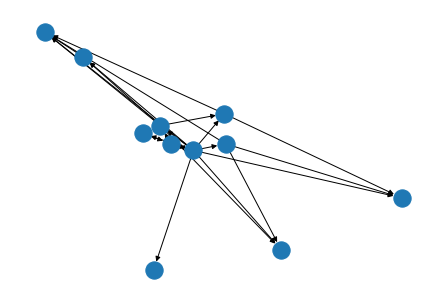

In [107]:
nx.draw_spring(S)

## Well that was slow as well ... 
Cytoscape ?

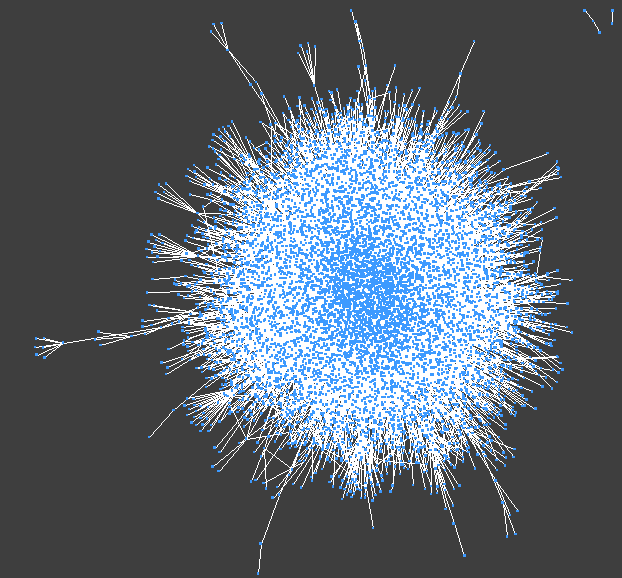

# Yeahhhh ! Alright have fun !